In [12]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from Utils import pandas_utils as pd_utils
from Utils import paths

importlib.reload(paths)
importlib.reload(pd_utils)

<module 'Utils.pandas_utils' from 'C:\\Users\\jllav\\IdeaProjects\\TFM\\Utils\\pandas_utils.py'>

In [2]:
# Cargamos los datos originales
fhr = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/fhr_ctu-chb.pickle")
uc = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/uc_ctu-chb.pickle")
clinical = pd.read_pickle(f"{paths.ORIGINAL_DATA_PATH}/clinical_ctu-chb.pickle")

fhr.columns = fhr.columns.astype('float64')
uc.columns = uc.columns.astype('float64')

# Labels
y = clinical['ph'].apply(lambda x: 0 if x >= 7.2 else 1)

fhr.shape, uc.shape, clinical.shape

((552, 21620), (552, 21620), (552, 17))

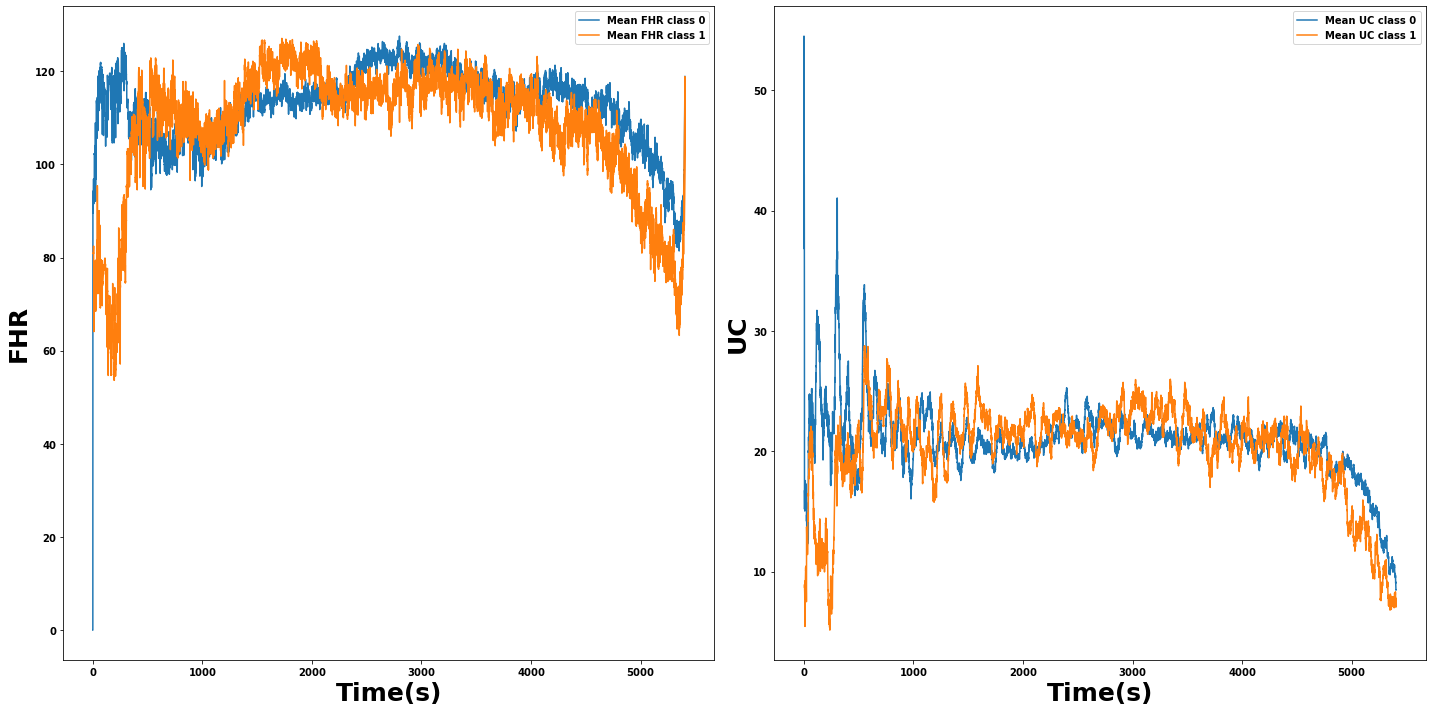

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc[y == 0].mean().index, uc[y == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc[y == 1].mean().index, uc[y == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots.png")


In [4]:
"""
Abnormal data based on an old criteria non obective non used anymore


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
for uc_idx in [1104, 1155, 1258]:
    ax.plot(uc.loc[uc_idx].values, label=uc_idx)
ax.set_title('Dismissed UC')
ax.legend()
fig.tight_layout()
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.png")
"""

'\nAbnormal data based on an old criteria non obective non used anymore\n\n\nfig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))\nfor uc_idx in [1104, 1155, 1258]:\n    ax.plot(uc.loc[uc_idx].values, label=uc_idx)\nax.set_title(\'Dismissed UC\')\nax.legend()\nfig.tight_layout()\nplt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.pdf")\nplt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Dismissed_uc.png")\n'

In [5]:
'''
To plot all uc DO NOT RUN it takes all ram

for idx, row in uc.copy().iterrows():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    uc_signal = uc.copy().loc[idx].values
    uc_signal[uc_signal == 0] = np.nan

    color = 'red' if y[idx] == 1 else 'blue'

    ax.plot(uc.columns.to_numpy(), uc_signal, color=color)
    ax.set_title(f"{idx}")
    ax.set_xlim((0, 5405))
    plt.savefig(f'{idx}.png')
    del fig
    del ax
    del uc_signal
    plt.close()
'''

'\nTo plot all uc DO NOT RUN it takes all ram\n\nfor idx, row in uc.copy().iterrows():\n    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))\n    uc_signal = uc.copy().loc[idx].values\n    uc_signal[uc_signal == 0] = np.nan\n\n    color = \'red\' if y[idx] == 1 else \'blue\'\n\n    ax.plot(uc.columns.to_numpy(), uc_signal, color=color)\n    ax.set_title(f"{idx}")\n    ax.set_xlim((0, 5405))\n    plt.savefig(f\'{idx}.png\')\n    del fig\n    del ax\n    del uc_signal\n    plt.close()\n'

In [6]:
'''
To plot all FHR DO NOT RUN it takes all ram

for idx, row in fhr.copy().iterrows():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    fhr_signal = fhr.copy().loc[idx].values
    fhr_signal[(fhr_signal == 0) | (fhr_signal >= 250)] = np.nan

    color = 'red' if y[idx] == 1 else 'blue'

    ax.plot(fhr .columns.to_numpy(), fhr_signal, color=color)
    ax.set_title(f"{idx}")
    ax.set_xlim((0, 5405))
    plt.savefig(f'fhr_{idx}.png')
    del fig
    del ax
    del fhr_signal
    plt.close()'''

'\nTo plot all FHR DO NOT RUN it takes all ram\n\nfor idx, row in fhr.copy().iterrows():\n    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))\n    fhr_signal = fhr.copy().loc[idx].values\n    fhr_signal[(fhr_signal == 0) | (fhr_signal >= 250)] = np.nan\n\n    color = \'red\' if y[idx] == 1 else \'blue\'\n\n    ax.plot(fhr .columns.to_numpy(), fhr_signal, color=color)\n    ax.set_title(f"{idx}")\n    ax.set_xlim((0, 5405))\n    plt.savefig(f\'fhr_{idx}.png\')\n    del fig\n    del ax\n    del fhr_signal\n    plt.close()'

In [7]:
fhr_clean = fhr.copy()
uc_clean = uc.copy()
y_clean = y.copy()

threshold = 5 * 4 # % segundos 4 Hz
for (idx_fhr, fhr_row), (idx_uc, uc_row) in tqdm(zip(fhr_clean.iterrows(), uc_clean.iterrows()), total=len(uc_clean)):
    # Remove extreme data
    fhr_row[(fhr_row <= 0) | (fhr_row >= 250)] = np.nan
    uc_row[uc_row <= 0] = np.nan

    # Remove constant data
    constant_parts_fhr = [x for x in np.split(fhr_row.index, np.where(np.diff(fhr_row.values) != 0)[0] + 1) if
                          x.size > threshold]
    constant_parts_uc = [x for x in np.split(uc_row.index, np.where(np.diff(uc_row.values) != 0)[0] + 1) if
                         x.size > threshold]

    for constant_part in constant_parts_fhr:
        fhr_row[constant_part] = np.nan

    for constant_part in constant_parts_uc:
        uc_row[constant_part] = np.nan

  0%|          | 0/552 [00:00<?, ?it/s]

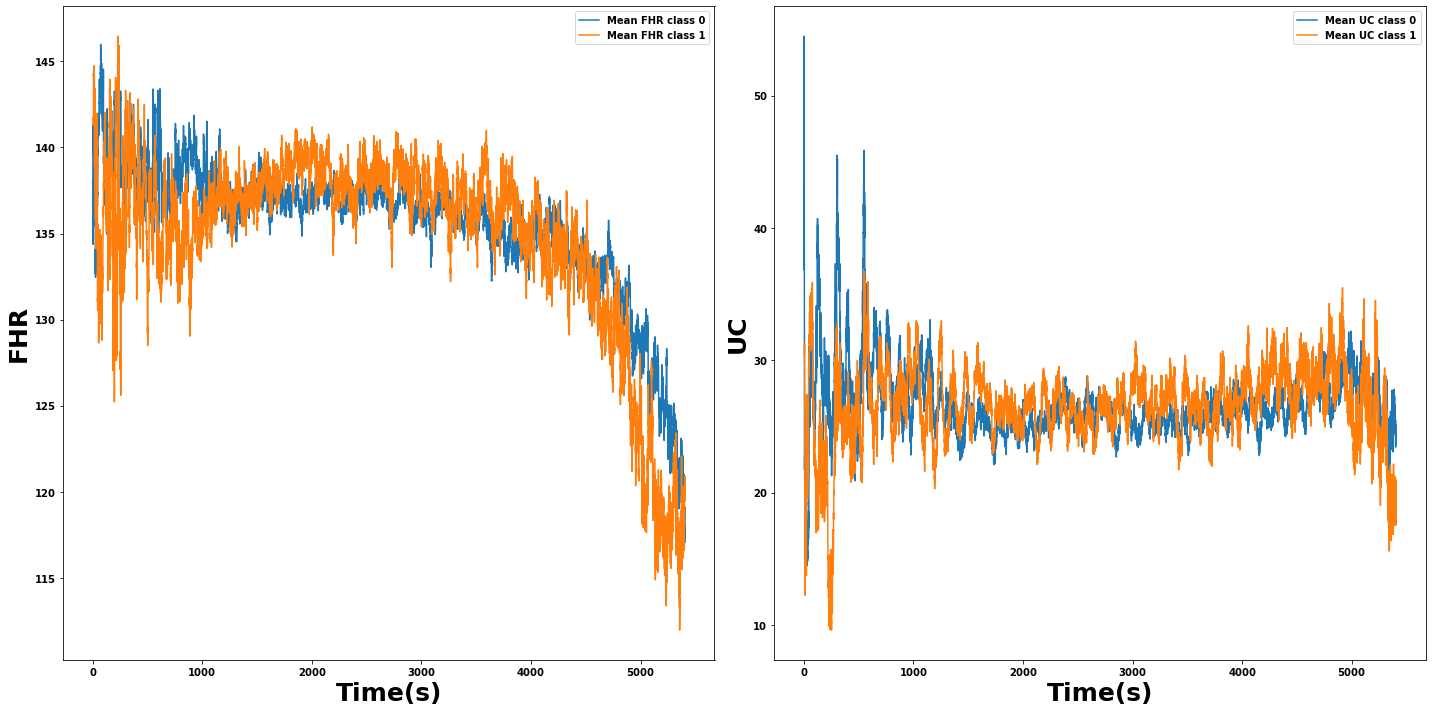

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr_clean[y_clean == 0].mean().index, fhr_clean[y_clean == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr_clean[y_clean == 1].mean().index, fhr_clean[y_clean == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc_clean[y_clean == 0].mean().index, uc_clean[y_clean == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc_clean[y_clean == 1].mean().index, uc_clean[y_clean == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()

plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots_clean.pdf")
plt.savefig(f"{paths.ORIGINAL_DATA_PLOTS}/Means_plots_clean.png")


In [13]:
uc_clean.to_csv(f"{paths.CLEAN_DATA_PATH}/uc.csv")
fhr_clean.to_csv(f"{paths.CLEAN_DATA_PATH}/fhr.csv")
y_clean.to_csv(f"{paths.CLEAN_DATA_PATH}/y.csv")

uc_clean.to_pickle(f"{paths.CLEAN_DATA_PATH}/uc.pickle")
fhr_clean.to_pickle(f"{paths.CLEAN_DATA_PATH}/fhr.pickle")
y_clean.to_pickle(f"{paths.CLEAN_DATA_PATH}/y.pickle")

In [14]:
# Check data is the same
test_fhr = pd.read_csv(f"{paths.CLEAN_DATA_PATH}/fhr.csv", index_col=0)
test_uc = pd.read_csv(f"{paths.CLEAN_DATA_PATH}/uc.csv", index_col=0)
test_y = pd.read_csv(f"{paths.CLEAN_DATA_PATH}/y.csv", index_col=0, squeeze=True)

test_fhr.columns = test_fhr.columns.astype('float64')
test_uc.columns = test_uc.columns.astype('float64')

test_fhr_pickle = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/fhr.pickle")
test_uc_pickle = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/uc.pickle")
test_y_pickle = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/y.pickle")

print(f"{test_fhr_pickle.equals(test_fhr)}")
print(f"{test_uc_pickle.equals(test_uc)}")
print(f"{test_y_pickle.equals(test_y)}")



True
True
True
